In [17]:
#load data from database
import sqlite3
import pandas as pd


# create connection to get data from database created 
conn=sqlite3.connect("economic_db")
gdp_data=pd.read_sql("SELECT * FROM gdp",conn)
unemployment_data=pd.read_sql("SELECT * FROM unemployment",conn)
inflation_data=pd.read_sql("SELECT * FROM inflation",conn)
government_spending_data=pd.read_sql("SELECT * FROM governement_spending",conn)
conn.close()

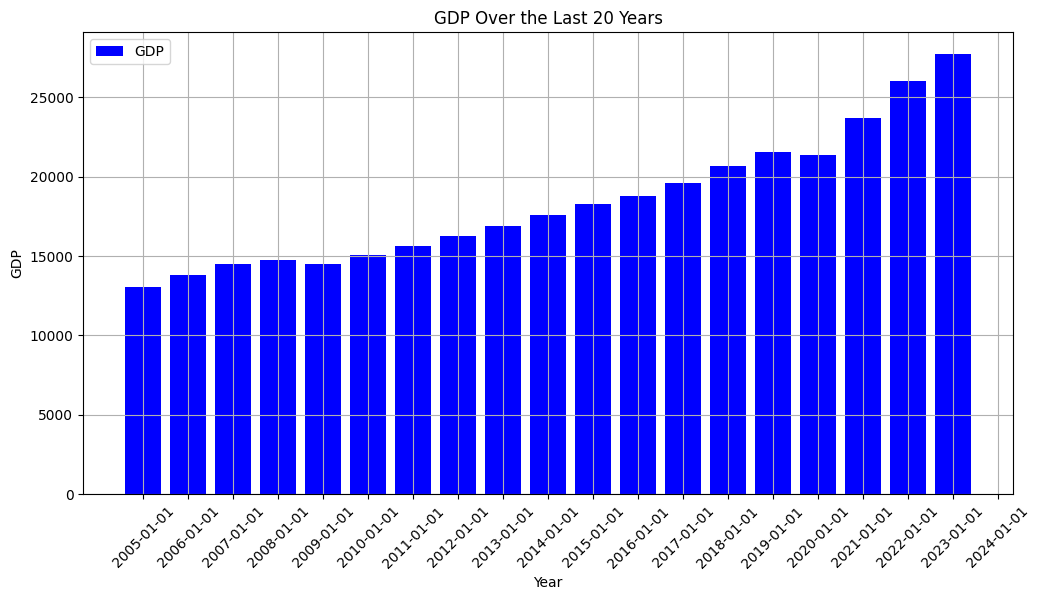

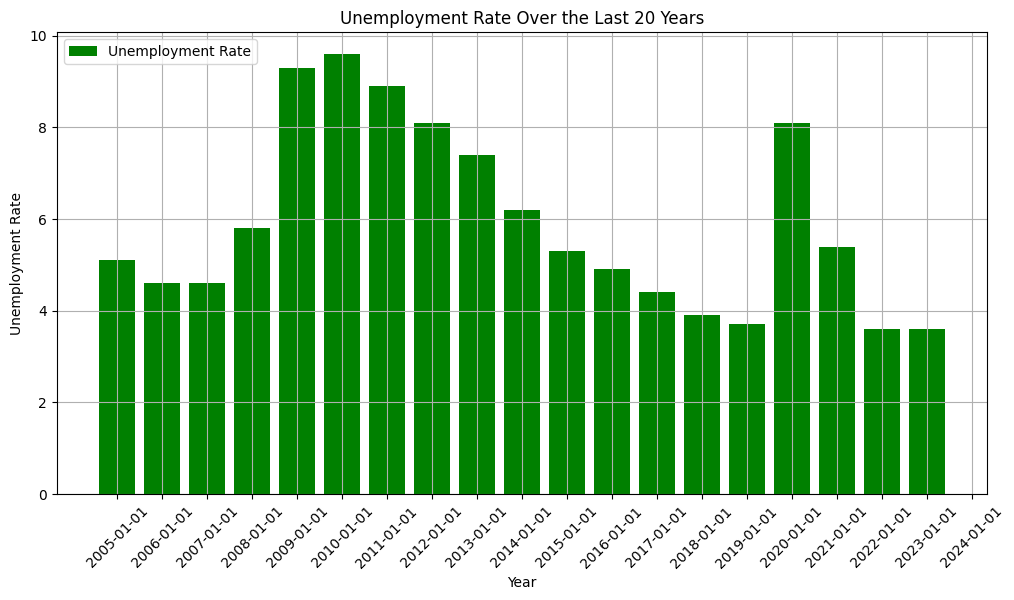

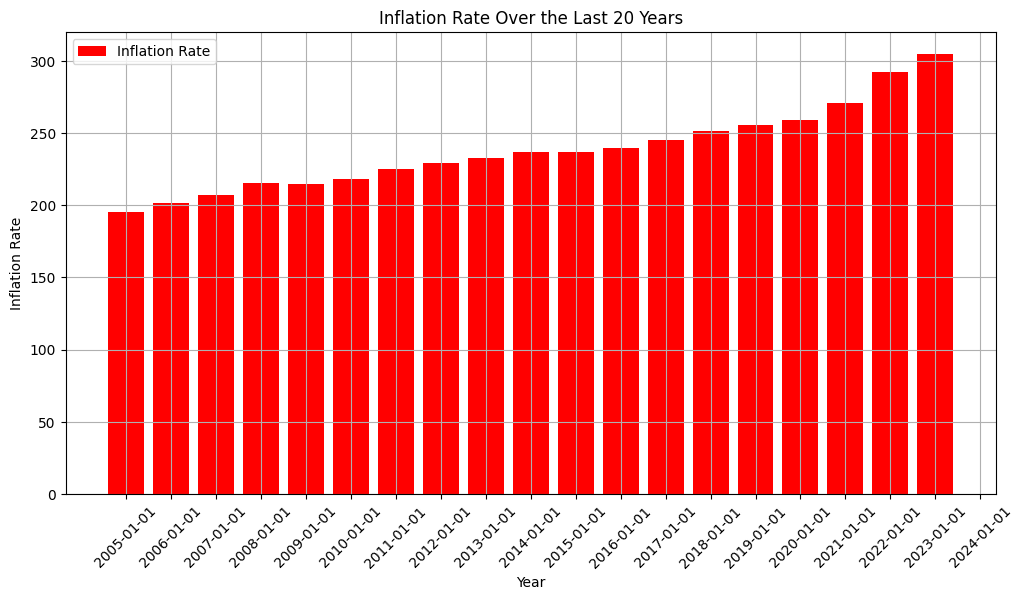

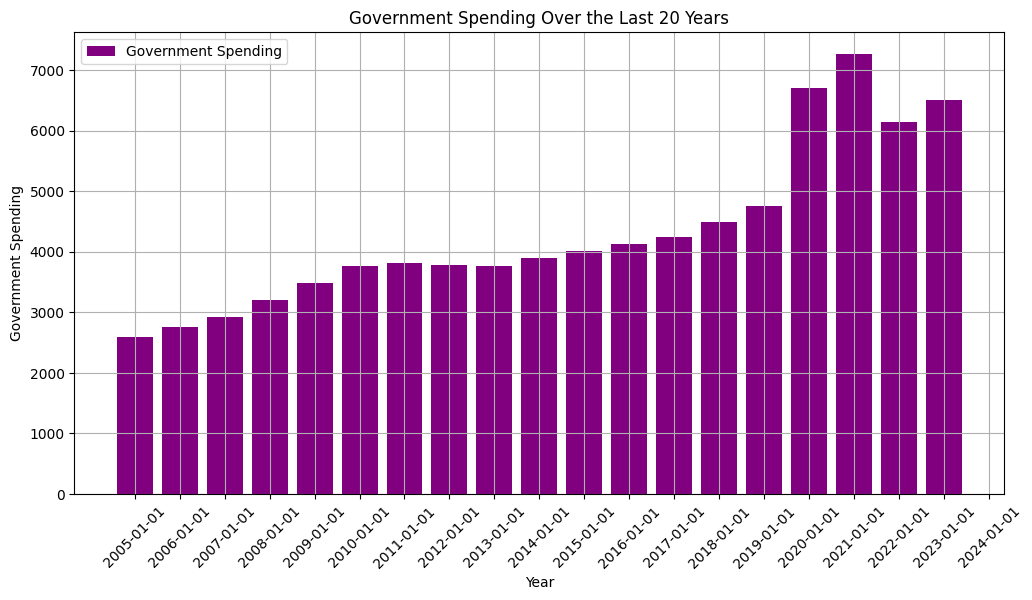

In [18]:
import matplotlib.pyplot as plt
gdp_data_last_20years=gdp_data.iloc[-20:]
unemployment_data_last_20years=unemployment_data.iloc[-20:]
inflation_data_last_20years=inflation_data.iloc[-20:]
government_spending_data_last_20years=government_spending_data.iloc[-20:]
# Plot GDP as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(gdp_data_last_20years['date'], gdp_data_last_20years['VALUE'], color='blue', label='GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Over the Last 20 Years')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap
plt.grid(True)
plt.show()

# Plot Unemployment Rate as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(unemployment_data_last_20years['date'], unemployment_data_last_20years['VALUE'], color='green', label='Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Over the Last 20 Years')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot Inflation Rate as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(inflation_data_last_20years['date'], inflation_data_last_20years['VALUE'], color='red', label='Inflation Rate')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.title('Inflation Rate Over the Last 20 Years')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot Government Spending as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(government_spending_data_last_20years['date'], government_spending_data_last_20years['VALUE'], color='purple', label='Government Spending')
plt.xlabel('Year')
plt.ylabel('Government Spending')
plt.title('Government Spending Over the Last 20 Years')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\hasna\AppData\Local\Temp\ipykernel_69544\1004950190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data_last_20years['rolling_mean'] = gdp_data_last_20years['VALUE'].rolling(window=3).mean()


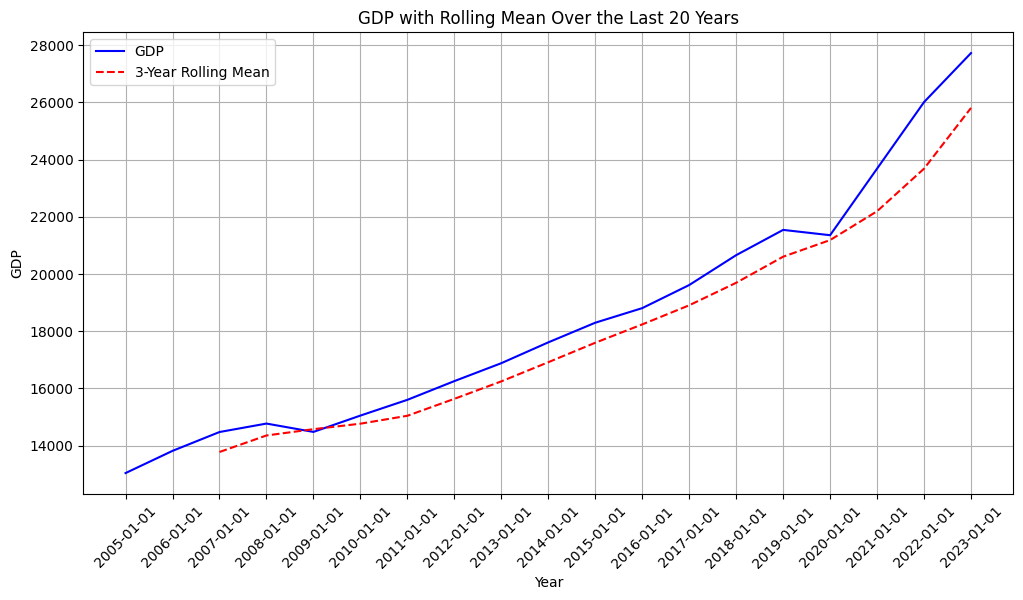

In [19]:
#Rolling Mean/Moving Average
gdp_data_last_20years['rolling_mean'] = gdp_data_last_20years['VALUE'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(gdp_data_last_20years['date'], gdp_data_last_20years['VALUE'], label='GDP', color='blue')
plt.plot(gdp_data_last_20years['date'], gdp_data_last_20years['rolling_mean'], label='3-Year Rolling Mean', color='red', linestyle='--')
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP with Rolling Mean Over the Last 20 Years')
plt.legend()
plt.grid()
plt.show()


This graph shows that GDP has been steadily increased over the last 20 years, reflecting the consistent growthin teh economy. The 3-year rolling mean smooths out short-term changes in the economy, it highlates the overall trend. Notable deviations include a dip during the 2008 financial crisis and a sharp drop in 2020 due to the COVID-19 pandemic, followed by a rapid recovery. The rolling mean confirms the long-term stability and growth of the economy despite these disruptions.

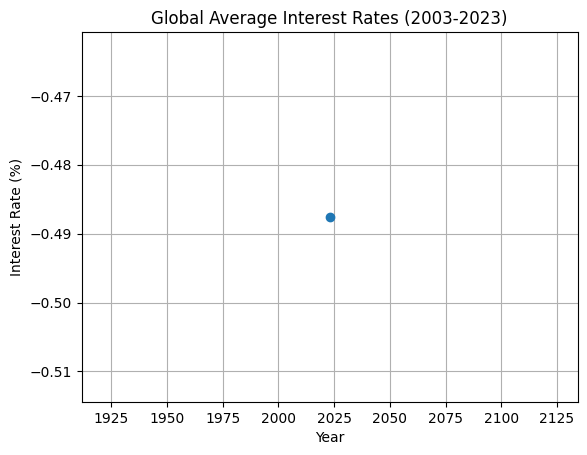

C:\Users\hasna\AppData\Local\Temp\ipykernel_69544\135138899.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Country",  loc='upper left', fontsize=8)


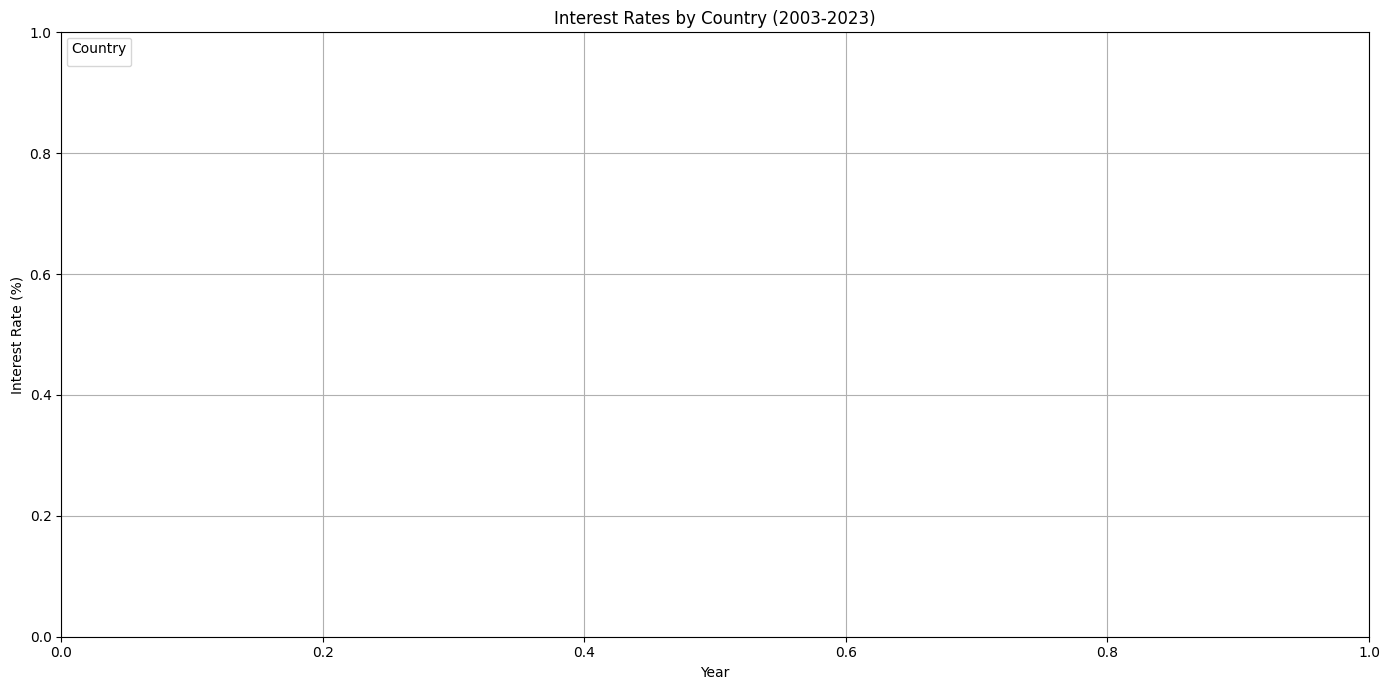

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import data_cleaning

# Get cleaned data
df_cleaned = data_cleaning.get_interest_rate()

# Group by Year and calculate the average interest rate
grouped = df_cleaned.groupby('Year')['Interest Rate'].mean()
# Plotting
plt.plot(grouped.index, grouped.values, marker='o')
plt.title('Global Average Interest Rates (2003-2023)')
plt.xlabel('Year')
plt.ylabel('Interest Rate (%)')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
selected_countries = ['United States', 'China', 'Germany']
df_filtered = df_cleaned[df_cleaned['Country Name'].isin(selected_countries)]
# Group by Country and Year for plotting

for country in df_filtered['Country Name'].unique():
    country_data = df_filtered[df_filtered['Country Name'] == country]
    plt.plot(
        country_data['Year'],
        country_data['Interest Rate'],
        marker='o',
        label=country
    )

# Customize plot
plt.title('Interest Rates by Country (2003-2023)')
plt.xlabel('Year')
plt.ylabel('Interest Rate (%)')
plt.grid(True)
plt.legend(title="Country",  loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()



Between 2003 and 2023, global interest rates saw significant fluctuations. In 2008, rates spiked above 10% as central banks has policies to control inflation before the financial crisis. After COVID-19 (2020-2023), global rates stabilized around 5% as governments balanced economic recovery with inflation management.

In 2008, China and the U.S. both had interest rates near 10%, reflecting strong pre-crisis growth and monetary tightening. However, their approaches diverged post-pandemic: China's current rate is around 5%, maintaining stability, while the U.S. dropped to -1%, showing a more aggressive strategy to stimulate the economy through negative real rates.

This divergence highlights different priorities: China focuses on balanced growth, while the U.S. risks potential inflation and currency depreciation by prioritizing economic stimulation.

## Correlation
Correlation is a measure that shows how two variables are related. It tells us if one variable increases or decreases when the other does the same.

In [13]:
import pandas as pd
import sqlite3

# Load interest rate data from CSV
interest_rate = pd.read_csv("API_FR.INR.RINR_DS2_en_csv_v2_119 (1)/API_FR.INR.RINR_DS2_en_csv_v2_119.csv", skiprows=4)

# Transform into long format
df_filtered = interest_rate.melt(id_vars=['Country Name'], var_name='Year', value_name='Interest Rate')

# Convert 'Year' to numeric and round it
df_filtered['Year'] = pd.to_numeric(df_filtered['Year'].dropna(), errors='coerce')
df_filtered['Interest Rate'] = pd.to_numeric(df_filtered['Interest Rate'], errors='coerce')


# Filter the data for the United States only
df_filtered = df_filtered[df_filtered['Country Name'] == 'United States']

# Create a connection to the SQLite database
conn = sqlite3.connect("economic_db")

# Load economic data from SQLite tables
gdp_data = pd.read_sql("SELECT * FROM gdp", conn)
unemployment_data = pd.read_sql("SELECT * FROM unemployment", conn)
inflation_data = pd.read_sql("SELECT * FROM inflation", conn)
government_spending_data = pd.read_sql("SELECT * FROM governement_spending", conn)

# Close the connection
conn.close()

# Extract the year from 'date' column (assuming 'date' is in YYYY-MM-DD format)
gdp_data['Year'] = pd.to_datetime(gdp_data['date']).dt.year
unemployment_data['Year'] = pd.to_datetime(unemployment_data['date']).dt.year
inflation_data['Year'] = pd.to_datetime(inflation_data['date']).dt.year
government_spending_data['Year'] = pd.to_datetime(government_spending_data['date']).dt.year

# Filter for the last 20 years of data
gdp_data_last_20years = gdp_data.iloc[:-20]
unemployment_data_last_20years = unemployment_data.iloc[:-20]
inflation_data_last_20years = inflation_data.iloc[:-20]
government_spending_data_last_20years = government_spending_data.iloc[:-20]

# # Rename columns to avoid conflicts
gdp_data_last_20years.rename(columns={'VALUE': 'GDP'},inplace=True)
unemployment_data_last_20years.rename(columns={'VALUE': 'Unemployment'},inplace=True)
inflation_data_last_20years.rename(columns={'VALUE': 'Inflation'},inplace=True)
government_spending_data_last_20years.rename(columns={'VALUE': 'Government Spending'},inplace=True)

# Merge the interest rate data with the economic data on 'Year'
df_combined = pd.merge(df_filtered, gdp_data_last_20years[['Year', 'GDP']], on='Year', how='inner')
df_combined = pd.merge(df_combined, unemployment_data_last_20years[['Year', 'Unemployment']], on='Year', how='inner')
df_combined = pd.merge(df_combined, inflation_data_last_20years[['Year', 'Inflation']], on='Year', how='inner')
df_combined = pd.merge(df_combined, government_spending_data_last_20years[['Year', 'Government Spending']], on='Year', how='inner')

# Drop rows with NaN values
df_combined = df_combined.dropna()
df_combined_numeric = df_combined.select_dtypes(include=['number'])


# Calculate the correlation matrix
correlation_matrix = df_combined_numeric.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                         Year  Interest Rate       GDP  Unemployment  \
Year                 1.000000       0.460502  0.966972      0.057415   
Interest Rate        0.460502       1.000000  0.390462      0.165602   
GDP                  0.966972       0.390462  1.000000     -0.081227   
Unemployment         0.057415       0.165602 -0.081227      1.000000   
Inflation            0.988899       0.504603  0.980964      0.039811   
Government Spending  0.979111       0.422411  0.994948     -0.019502   

                     Inflation  Government Spending  
Year                  0.988899             0.979111  
Interest Rate         0.504603             0.422411  
GDP                   0.980964             0.994948  
Unemployment          0.039811            -0.019502  
Inflation             1.000000             0.992566  
Government Spending   0.992566             1.000000  


C:\Users\hasna\AppData\Local\Temp\ipykernel_69544\1517676853.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data_last_20years.rename(columns={'VALUE': 'GDP'},inplace=True)
C:\Users\hasna\AppData\Local\Temp\ipykernel_69544\1517676853.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_data_last_20years.rename(columns={'VALUE': 'Unemployment'},inplace=True)
C:\Users\hasna\AppData\Local\Temp\ipykernel_69544\1517676853.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

## Interpretation:
* The correlation between GDP and Unemployment is negative -0.081227, it suggests that as GDP increases, unemployment tends to decrease (which is a normal economic pattern).
* A positive correlation between Interest Rate and Inflation  0.504603 suggests that as interest rates go up, inflation also tends to increase.
* A negative correlation between Government Spending and Interest Rate 0.422411 indicates that there is a weak inverse relationship between the two.
